In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [2]:
ufo_data = pd.read_csv('merged_ufo_elect_data.csv')

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:

ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34525 entries, 0 to 34524
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            34525 non-null  int64  
 1   date                  34349 non-null  object 
 2   time                  34349 non-null  object 
 3   year                  34525 non-null  int64  
 4   city                  34349 non-null  object 
 5   state_x               34349 non-null  object 
 6   shape                 33138 non-null  object 
 7   duration (seconds)    34348 non-null  object 
 8   duration (hours/min)  33196 non-null  object 
 9   comments              34330 non-null  object 
 10  date posted           34349 non-null  object 
 11  latitude              34349 non-null  float64
 12  longitude             34349 non-null  float64
 13  candidate             9434 non-null   object 
 14  party                 9434 non-null   object 
 15  candidatevotes     

In [5]:
rep = 0
dem = 0
year = 0
for i, obj in ufo_data.iterrows(): 
    if pd.notna(obj["date"]):
       
        if obj["party"] == "republican":
            rep += 1
            year += 1
        elif obj["party"] == "democrat":
            dem += 1
            year += 1
     
print("dems:", dem)
print("rep:", rep)



dems: 5645
rep: 3531


In [6]:
filt_objs = []
for i, obj in ufo_data.iterrows():
    if pd.notna(obj["year"]) and pd.notna(obj["totalvotes"]) and pd.notna(obj["state_x"]):
        filt_objs.append(obj)
    

In [7]:
df = pd.DataFrame(filt_objs)

In [8]:
df.head()

,Unnamed: 0,date,time,year,city,state_x,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,candidate,party,candidatevotes,totalvotes
41,41,1976-10-10,20:30,1976,washougal,WA,oval,60,1 minute,Three extremely large lights hanging above nea...,2/7/2014,45.582778,-122.352222,"Ford, Gerald",republican,777732.0,1555534.0
69,69,1980-10-10,19:00,1980,houston,TX,sphere,180,3 min,Sphere&#44 No lights&#44 moving through neigh...,4/16/2005,29.763056,-95.363056,"Reagan, Ronald",republican,2510705.0,4541636.0
70,70,1980-10-10,22:00,1980,dallas,TX,unknown,300,5 minutes,Strange shape shifting craft of pure light ene...,10/28/2002,32.783333,-96.800000,"Reagan, Ronald",republican,2510705.0,4541636.0
71,71,1980-10-20,18:00,1980,corpus christi (maliki beach),TX,disk,300,5min,METALIC RED PORTHOLES HOVERED OFFSHORE AT DUSK...,8/30/1999,27.800278,-97.396111,"Reagan, Ronald",republican,2510705.0,4541636.0
72,72,1980-10-20,19:00,1980,dallas,TX,triangle,2700,30-45 min,We were in a boat fishing at Lake Ray Hubbard&...,4/27/2004,32.783333,-96.800000,"Reagan, Ronald",republican,2510705.0,4541636.0


In [9]:
states = set()
for i, obj in df.iterrows():
    states.add(obj["state_x"])
    
years = set()
for i, obj in df.iterrows():
    years.add(obj["year"])

In [10]:
# table = {}
year_sums = []
years = sorted(list(years))
for year in years:
    year_sum = 0
    state_dic = set()
    for i, obj in df.iterrows():
        if int(obj["year"]) == int(year):
            if obj["state_x"] not in state_dic:
                year_sum += int(obj["totalvotes"])
                state_dic.add(obj["state_x"])
                
    year_sums.append(year_sum)

# print(years)
# print(year_sums)

In [11]:
# x = []
# y = []
# for i, obj in ufo_data.iterrows():
#     if pd.notna(obj["year"]) and pd.notna(obj["totalvotes"]):
#         x.append(obj["year"])
#         y.append(float(obj["totalvotes"]))

# dates = ufo_data["date"]
# # time = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
# turnout = [float(num) for num in ufo_data["totalvotes"]]

# plt.rcParams["figure.figsize"] = (16, 12)
# plt.scatter(years, year_sums, color="red")
# plt.gcf().autofmt_xdate()
# plt.show()

In [12]:
#pd.plotting.scatter_matrix(ufo_data)

### Sightings increasing over year?


In [13]:
year_counts = {}

sightings = []

for i, obj in ufo_data.iterrows():
    if pd.notna(obj["date"]):
        sightings.append(obj)

accounts = pd.DataFrame(sightings)

In [14]:
for i, obj in accounts.iterrows():
    if obj["year"] not in year_counts.keys():
        year_counts[obj["year"]] = 1
    else:
        year_counts[obj["year"]] += 1

# print(year_counts)

<BarContainer object of 77 artists>

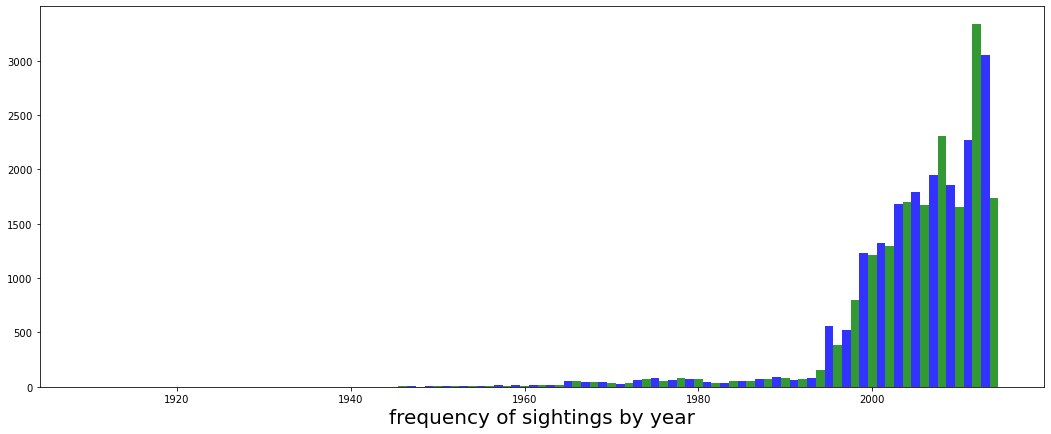

In [15]:
tups = sorted(year_counts.items()) 
# print(tups)
x, y = zip(*tups)
plt.rcParams["figure.figsize"] = (18,7)
plt.xlabel("frequency of sightings by year", fontsize=20)
plt.bar(x, y, color=["green", "blue"], alpha=.8, width=1)

In [16]:
# data from https://en.wikipedia.org/wiki/Voter_turnout_in_the_United_States_presidential_elections#:~:text=Note%3A%20The%20Bipartisan%20Policy%20Center,62.3%25%3B%20and%202012%2057.5%25.
turnout = [ (1944,  48026000), (1948,  48834000), (1952,61552000),
           (1956,62027000), (1960, 68836000), (1964,70098000), (1968, 73027000),
           (1972, 77625000), (1976, 81603000), (1980, 86497000),(1984, 92655000),
           (1988, 91587000), (1992,104600000), (1996,96390000), (2000, 105594000),
           (2004, 122349000), (2008, 131407000), (2012, 129235000), (2016, 138847000)
          ]

year_turn, num_turn = zip(*turnout)


<BarContainer object of 19 artists>

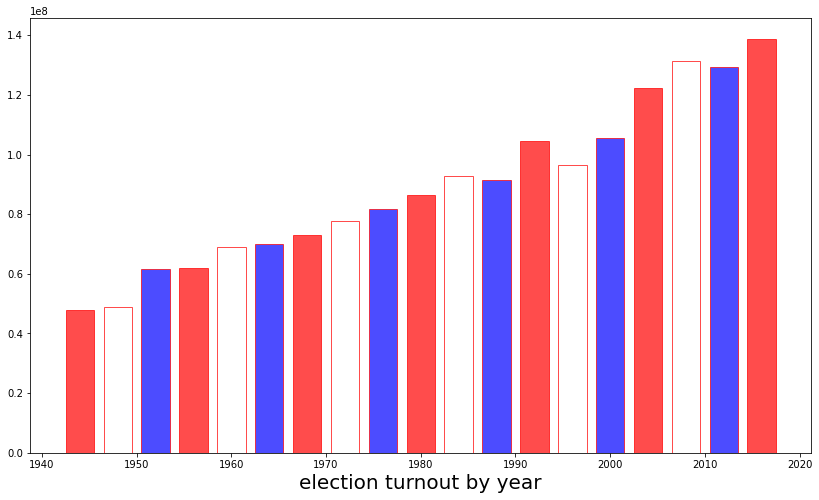

In [17]:
plt.rcParams["figure.figsize"] = (14,8)
plt.xlabel("election turnout by year", fontsize=20)
plt.bar(year_turn, num_turn, color=["red", "white", "blue"], width=3, edgecolor="red", alpha=.7)

In [18]:
visits = []
for tup in tups:
    if tup[0] in year_turn:
        visits.append(tup[1])

In [19]:
elect = []
i = 0
while i < len(visits):
    row = [visits[i], year_turn[i], num_turn[i]]
    elect.append(row)
    i += 1
    
elect_df = pd.DataFrame(elect, columns=["visits", "year", "turnout_total"])

In [20]:
elect_df

,visits,year,turnout_total
0,2,1944,48026000
1,1,1948,48834000
2,7,1952,61552000
3,8,1956,62027000
4,11,1960,68836000
5,16,1964,70098000
6,43,1968,73027000
7,34,1972,77625000
8,53,1976,81603000
9,71,1980,86497000


In [21]:
corelation = elect_df.corr()
print(corelation)

                 visits      year  turnout_total
visits         1.000000  0.738996       0.801308
year           0.738996  1.000000       0.980699
turnout_total  0.801308  0.980699       1.000000


In [23]:
shape_counts = {}
for i, obj in accounts.iterrows():
    if obj["shape"] not in shape_counts.keys():
        shape_counts[obj["shape"]] = 1
    else:
        shape_counts[obj["shape"]] += 1

# print(shape_counts)



<BarContainer object of 28 artists>

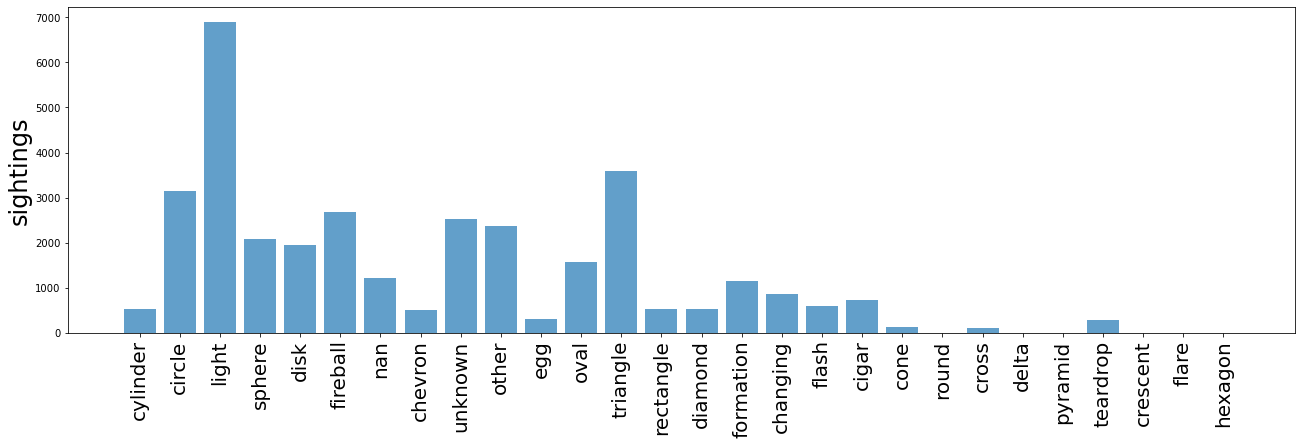

In [24]:
shape_x = list(shape_counts.keys())
shape_y = list(shape_counts.values())
shape_x = [str(shape) for shape in shape_x]
# print(shape_y)
# print(shape_x)
plt.rcParams["figure.figsize"] = (22,6)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel("sightings", fontsize=24)
plt.bar(shape_x, shape_y, alpha=.7)


In [25]:

import seaborn as sns
# ax = sns.heatmap([[i for i, shape in enumerate(shape_x)], shape_y], linewidth=0.7, xticklabels=shape_x)
# # plt.imshow([[i for i, shape in enumerate(shape_x)], shape_y], cmap='viridis', interpolation='nearest')

In [26]:
shape_year = {}
for i, obj in accounts.iterrows():
    if obj["year"] not in shape_year.keys():
        shape_year[obj["year"]] = {obj["shape"] : 1}
    elif obj["shape"] not in shape_year[obj["year"]].keys():
        shape_year[obj["year"]][obj["shape"]] = 1
    else:
        shape_year[obj["year"]][obj["shape"]] += 1



In [27]:
import collections
ordered_by_year = collections.OrderedDict(sorted(shape_year.items()))


df_shape_year = pd.DataFrame(ordered_by_year)
df_shape_year.head()


,1910,1925,1931,1936,1942,1943,1944,1945,1946,1947,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
disk,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,...,97.0,87.0,106.0,138.0,87.0,84.0,95.0,100.0,80.0,61.0
oval,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.0,90.0,105.0,123.0,89.0,84.0,124.0,157.0,116.0,73.0
cigar,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,44.0,36.0,48.0,62.0,35.0,27.0,34.0,41.0,51.0,27.0
unknown,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,143.0,149.0,169.0,194.0,152.0,123.0,169.0,257.0,191.0,129.0
rectangle,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,26.0,30.0,36.0,45.0,32.0,30.0,32.0,65.0,42.0,24.0


In [28]:
# cleaning
df_shape_year = df_shape_year.fillna(0)

In [29]:
df_shape_year.head()

,1910,1925,1931,1936,1942,1943,1944,1945,1946,1947,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
disk,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,...,97.0,87.0,106.0,138.0,87.0,84.0,95.0,100.0,80.0,61.0
oval,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77.0,90.0,105.0,123.0,89.0,84.0,124.0,157.0,116.0,73.0
cigar,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,44.0,36.0,48.0,62.0,35.0,27.0,34.0,41.0,51.0,27.0
unknown,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,143.0,149.0,169.0,194.0,152.0,123.0,169.0,257.0,191.0,129.0
rectangle,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,26.0,30.0,36.0,45.0,32.0,30.0,32.0,65.0,42.0,24.0


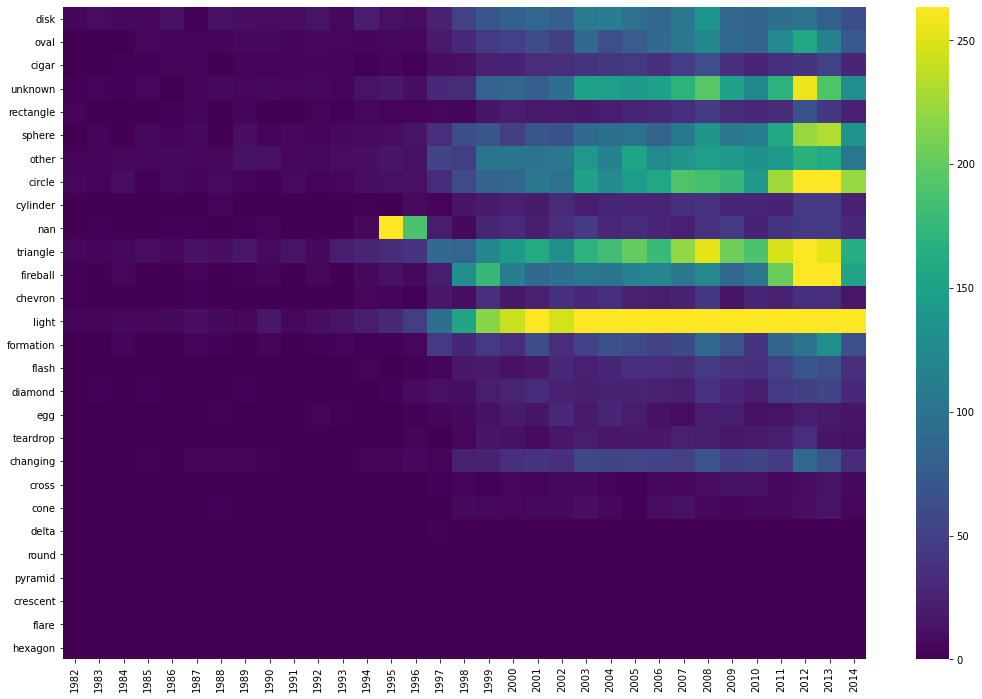

In [30]:
plt.rcParams["figure.figsize"] = (18,12)
ax = sns.heatmap(df_shape_year.loc[:,1982:],cmap='viridis', robust=True)


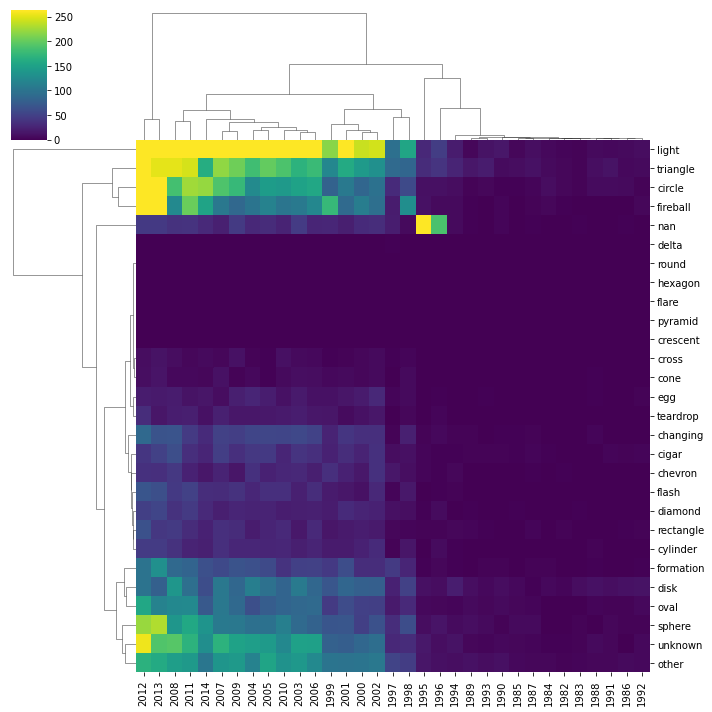

In [31]:
ax = sns.clustermap(df_shape_year.loc[:,1982:],cmap='viridis', robust=True)

In [32]:
state_year = {}
for i, obj in accounts.iterrows():
    if obj["year"] not in state_year.keys():
        state_year[obj["year"]] = {obj["state_x"] : 1}
    elif obj["state_x"] not in state_year[obj["year"]].keys():
        state_year[obj["year"]][obj["state_x"]] = 1
    else:
        state_year[obj["year"]][obj["state_x"]] += 1


In [33]:
od_state = collections.OrderedDict(sorted(state_year.items()))


df_state_year = pd.DataFrame(od_state)
df_state_year = df_state_year.fillna(0)
df_state_year.head()

,1910,1925,1931,1936,1942,1943,1944,1945,1946,1947,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
MO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,37.0,54.0,39.0,48.0,34.0,62.0,78.0,39.0,24.0
IL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,57.0,75.0,69.0,55.0,64.0,75.0,111.0,67.0,18.0
CO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,56.0,45.0,44.0,38.0,24.0,50.0,65.0,74.0,36.0
AK,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,11.0,4.0,8.0,8.0,9.0,15.0,34.0,37.0,21.0
CA,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,266.0,280.0,317.0,401.0,333.0,264.0,318.0,356.0,359.0,241.0


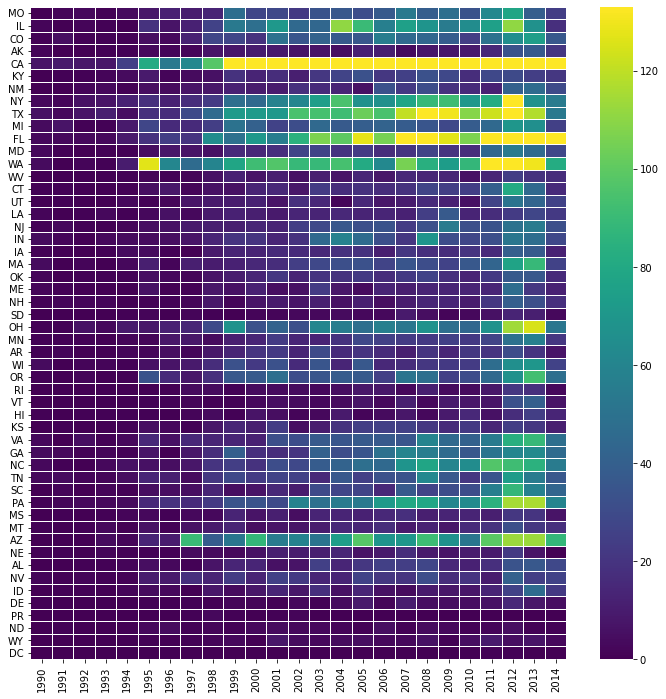

In [34]:
plt.rcParams["figure.figsize"] = (12,12)
ax = sns.heatmap(df_state_year.loc[ : ,1990:],cmap='viridis', linewidths=.05, robust=True)

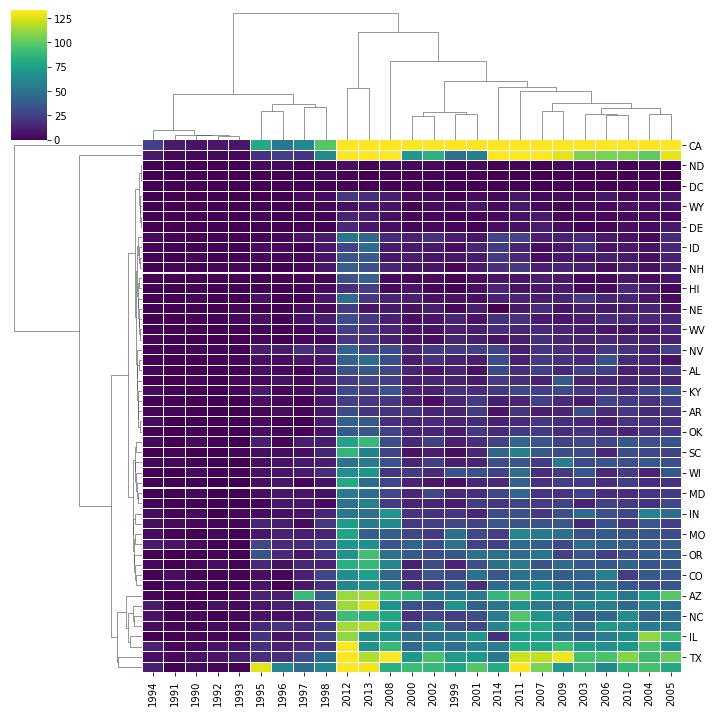

In [35]:
ax = sns.clustermap(df_state_year.loc[ : ,1990:],cmap='viridis', linewidths=.05, robust=True)

In [36]:
state_shape = {}
for i, obj in accounts.iterrows():
    if obj["state_x"] not in state_shape.keys():
        state_shape[obj["state_x"]] = {obj["shape"] : 1}
    elif obj["shape"] not in state_shape[obj["state_x"]].keys():
        state_shape[obj["state_x"]][obj["shape"]] = 1
    else:
        state_shape[obj["state_x"]][obj["shape"]] += 1

In [37]:
df_state_shape = pd.DataFrame(state_shape)
df_state_shape = df_state_shape.fillna(0)
df_state_shape.head()

,TX,HI,TN,CT,AL,FL,CA,NC,NY,KY,...,ND,PR,MS,UT,MD,MT,WY,SD,DE,DC
cylinder,34.0,3.0,18.0,11.0,8.0,38.0,66.0,13.0,25.0,5.0,...,0.0,0.0,8.0,1.0,3.0,3.0,0.0,1.0,1.0,1.0
circle,162.0,18.0,63.0,50.0,41.0,237.0,478.0,106.0,120.0,34.0,...,6.0,1.0,25.0,26.0,50.0,18.0,4.0,6.0,13.0,0.0
other,163.0,7.0,43.0,27.0,24.0,167.0,337.0,61.0,103.0,29.0,...,2.0,0.0,16.0,20.0,36.0,16.0,6.0,8.0,5.0,1.0
unknown,158.0,5.0,57.0,33.0,22.0,174.0,310.0,77.0,96.0,33.0,...,1.0,1.0,16.0,22.0,34.0,27.0,6.0,5.0,6.0,0.0
chevron,35.0,0.0,11.0,7.0,5.0,30.0,88.0,15.0,27.0,6.0,...,1.0,0.0,2.0,3.0,6.0,4.0,3.0,1.0,2.0,0.0


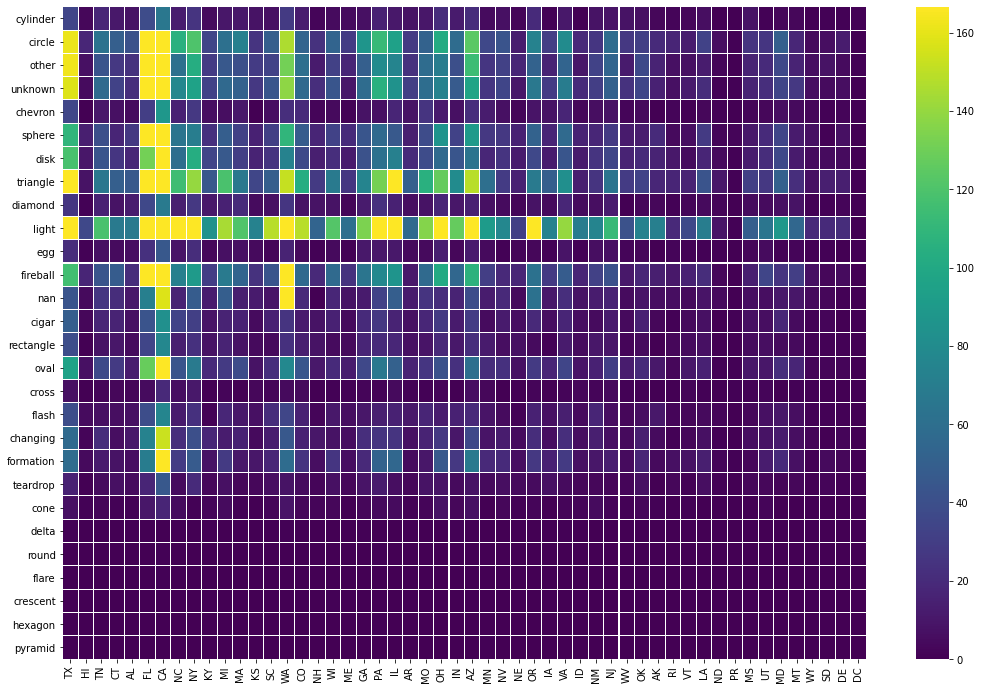

In [38]:
plt.rcParams["figure.figsize"] = (18,12)
ax = sns.heatmap(df_state_shape,cmap='viridis', linewidths=.05, robust=True)

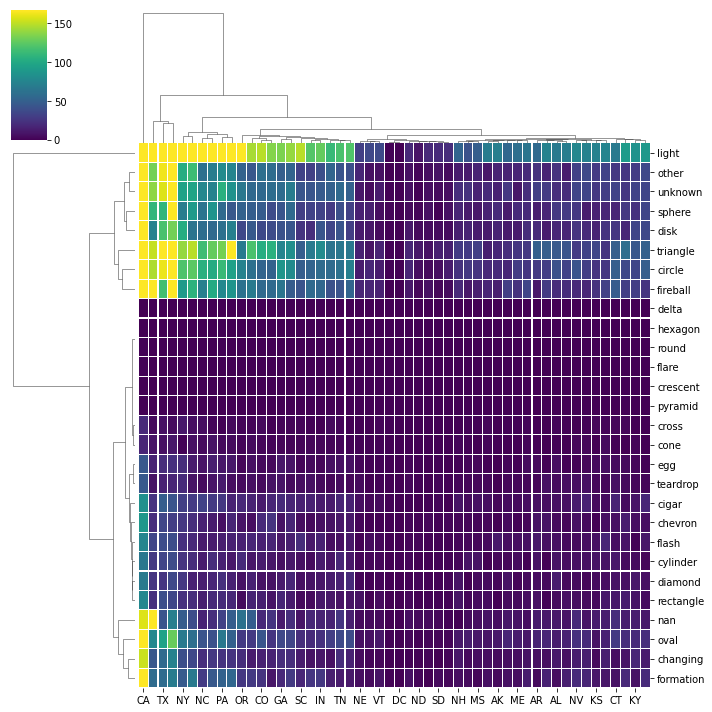

In [39]:
ax = sns.clustermap(df_state_shape,cmap='viridis', linewidths=.05, robust=True)